<a href="https://www.kaggle.com/code/sachinmaurya123/clustering-financial-ratios-2021?scriptVersionId=95721242" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank2020/BanksFinancialDataandRatio2020.csv
/kaggle/input/bank2021/BanksFinancialDataandRatio2021.csv
/kaggle/input/banks2020/BanksFinancialDataandRatio2020.csv
/kaggle/input/banksdata2021/BanksFinancialDataandRatio2021V5.csv


# 1. Import Libraries


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# 2. Loading Data

In [3]:
data = pd.read_csv('../input/banksdata2021/BanksFinancialDataandRatio2021V5.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Emiten  26 non-null     object 
 1   DER     26 non-null     float64
 2   ROA     26 non-null     float64
 3   NPM     26 non-null     float64
dtypes: float64(3), object(1)
memory usage: 960.0+ bytes


In [4]:
data.describe()

,DER,ROA,NPM
count,26.000000,26.000000,26.000000
mean,4.605385,0.023077,0.410769
std,2.890878,0.020351,0.484644
min,0.080000,0.010000,0.080000
25%,2.962500,0.010000,0.155000
50%,4.410000,0.020000,0.210000
75%,5.962500,0.030000,0.435000
max,10.540000,0.090000,2.080000


In [5]:
display(data)

,Emiten,DER,ROA,NPM
0,BANK,0.08,0.03,2.08
1,AGRS,5.41,0.01,0.12
2,ARTO,0.48,0.01,0.13
3,BBCA,5.03,0.03,0.46
4,BBHI,2.57,0.02,0.20
5,BBKP,10.03,0.03,0.73
6,BBMD,2.73,0.03,0.38
7,BBRI,4.75,0.02,0.19
8,BBSI,0.20,0.02,0.47
9,BCIC,7.01,0.02,0.45


# 3. Scatter Plot

<Figure size 2160x2160 with 0 Axes>

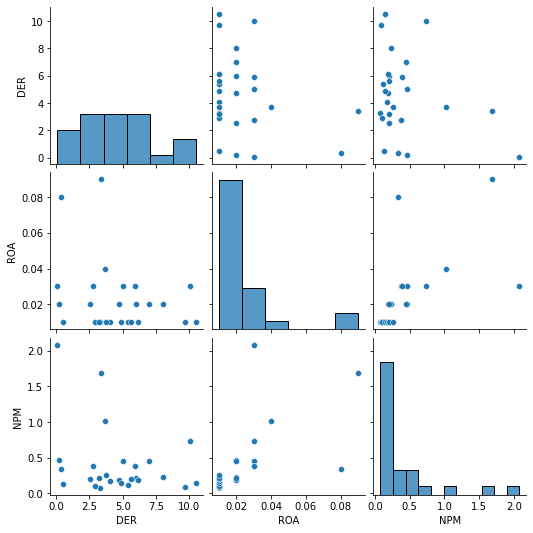

In [6]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, vars = data.columns[1:6]);

Add new column into dataset

In [7]:
data["category"] = pd.NaT

In [8]:
data.describe()

,DER,ROA,NPM
count,26.000000,26.000000,26.000000
mean,4.605385,0.023077,0.410769
std,2.890878,0.020351,0.484644
min,0.080000,0.010000,0.080000
25%,2.962500,0.010000,0.155000
50%,4.410000,0.020000,0.210000
75%,5.962500,0.030000,0.435000
max,10.540000,0.090000,2.080000


In [9]:
data.head()

,Emiten,DER,ROA,NPM,category
0,BANK,0.08,0.03,2.08,NaT
1,AGRS,5.41,0.01,0.12,NaT
2,ARTO,0.48,0.01,0.13,NaT
3,BBCA,5.03,0.03,0.46,NaT
4,BBHI,2.57,0.02,0.20,NaT


# Scatter Plot

<AxesSubplot:xlabel='Emiten', ylabel='NPM'>

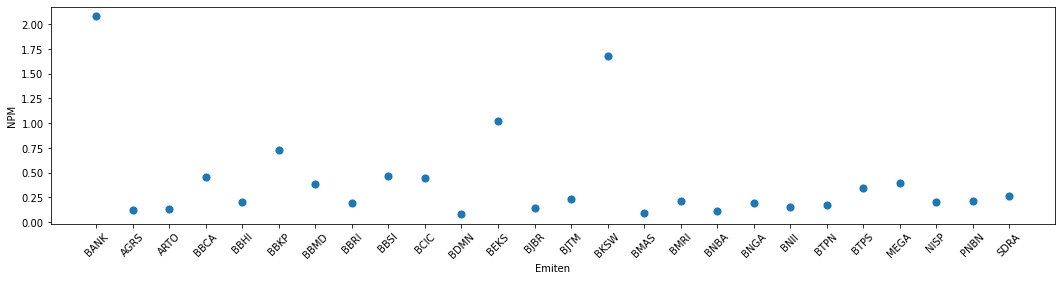

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='NPM', 
                data=data, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='DER'>

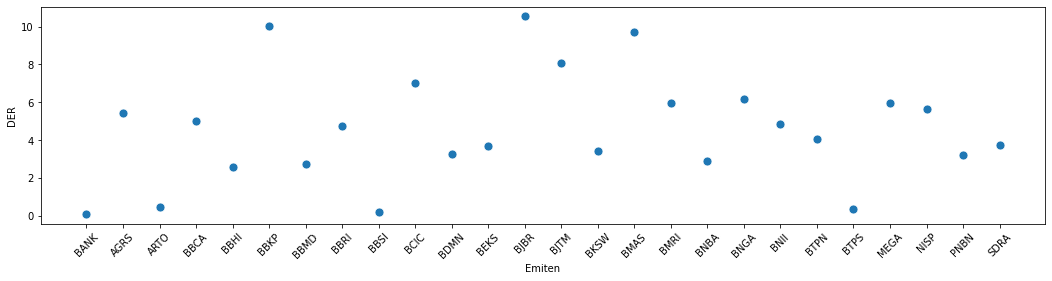

In [11]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='DER', 
                data=data, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='ROA'>

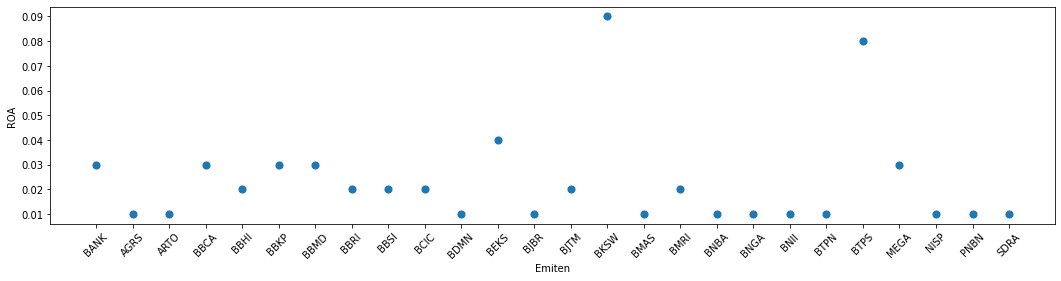

In [12]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='ROA', 
                data=data, s=80)

# 3. Outlier

In [13]:
print(f'Number of rows before filtering outliers: {len(data)}')

filtered_entries = np.array([False] * len(data))
for col in ['DER']:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
data = data[filtered_entries]

print(f'Number of rows after filtering outliers: {len(data)}')

Number of rows before filtering outliers: 26
Number of rows after filtering outliers: 26


In [14]:
data.describe()

,DER,ROA,NPM
count,26.000000,26.000000,26.000000
mean,4.605385,0.023077,0.410769
std,2.890878,0.020351,0.484644
min,0.080000,0.010000,0.080000
25%,2.962500,0.010000,0.155000
50%,4.410000,0.020000,0.210000
75%,5.962500,0.030000,0.435000
max,10.540000,0.090000,2.080000


# 4. Normalization

In [15]:

feats = ['DER','ROA','NPM']
X = data[feats].values
y = data['category'].values

from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler().fit_transform(X)
new_dataframe = pd.DataFrame(data = standardscaler, columns = feats)
new_dataframe.describe()

,DER,ROA,NPM
count,2.600000e+01,2.600000e+01,2.600000e+01
mean,8.967186e-17,-2.732857e-16,-1.216975e-16
std,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.596402e+00,-6.553018e-01,-6.960162e-01
25%,-5.795540e-01,-6.553018e-01,-5.381985e-01
50%,-6.892507e-02,-1.541887e-01,-4.224656e-01
75%,4.787443e-01,3.469245e-01,5.098723e-02
max,2.093531e+00,3.353604e+00,3.512454e+00


In [16]:
new_dataframe.head()

,DER,ROA,NPM
0,-1.596402,0.346925,3.512454
1,0.283841,-0.655302,-0.611847
2,-1.455296,-0.655302,-0.590804
3,0.149790,0.346925,0.103593
4,-0.718015,-0.154189,-0.443508


# 5. K-means Clustering

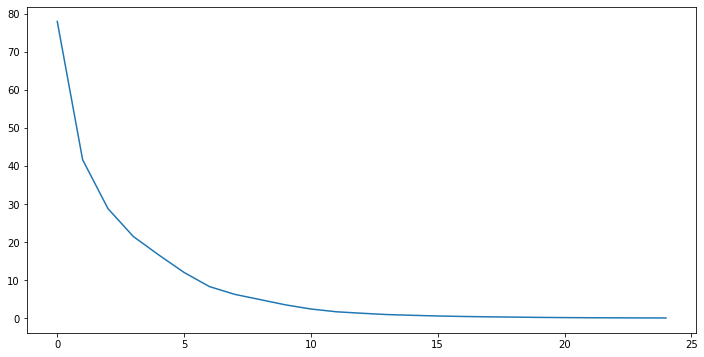

In [17]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 26):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_dataframe.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Determine number of cluster

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=12, random_state=0)
kmeans.fit(new_dataframe.values)

KMeans(n_clusters=4, n_init=12, random_state=0)

In [19]:
new_dataframe['target'] = y
new_dataframe['fit'] = kmeans.labels_

# Plot Cluster

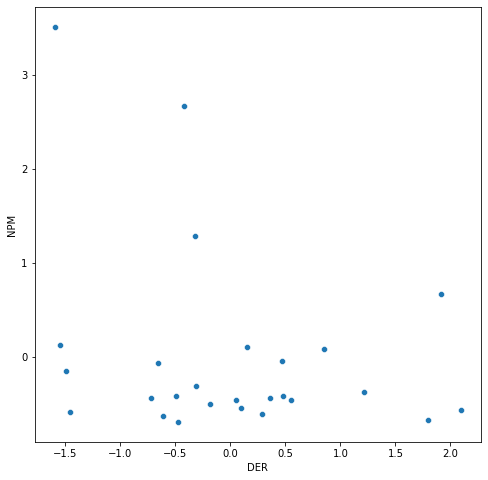

In [20]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='NPM', hue=new_dataframe.target.to_list(), data=new_dataframe);

In [21]:
new_dataframe.head(26)

,DER,ROA,NPM,target,fit
0,-1.596402,0.346925,3.512454,NaT,2
1,0.283841,-0.655302,-0.611847,NaT,1
2,-1.455296,-0.655302,-0.590804,NaT,1
3,0.149790,0.346925,0.103593,NaT,1
4,-0.718015,-0.154189,-0.443508,NaT,1
5,1.913620,0.346925,0.671737,NaT,0
6,-0.661572,0.346925,-0.064746,NaT,1
7,0.051015,-0.154189,-0.464550,NaT,1
8,-1.554070,-0.154189,0.124635,NaT,1
9,0.848267,-0.154189,0.082551,NaT,0


In [22]:
new_dataframe.insert(0,"category",np.nan,True)
new_dataframe.loc[new_dataframe['fit'] == 0, 'category'] = 2
new_dataframe.loc[new_dataframe['fit'] == 1, 'category'] = 3
new_dataframe.loc[new_dataframe['fit'] == 2, 'category'] = 1
new_dataframe.loc[new_dataframe['fit'] == 3, 'category'] = 0
new_dataframe['category'] = new_dataframe['category'].astype(int)
new_dataframe.head(26)

,category,DER,ROA,NPM,target,fit
0,1,-1.596402,0.346925,3.512454,NaT,2
1,3,0.283841,-0.655302,-0.611847,NaT,1
2,3,-1.455296,-0.655302,-0.590804,NaT,1
3,3,0.149790,0.346925,0.103593,NaT,1
4,3,-0.718015,-0.154189,-0.443508,NaT,1
5,2,1.913620,0.346925,0.671737,NaT,0
6,3,-0.661572,0.346925,-0.064746,NaT,1
7,3,0.051015,-0.154189,-0.464550,NaT,1
8,3,-1.554070,-0.154189,0.124635,NaT,1
9,2,0.848267,-0.154189,0.082551,NaT,0


# Adjust column name to (St.) = Standardized

In [23]:
new_dataframe.drop(["fit","target"], axis=1, inplace=True)
new_dataframe.columns = ['category', 'NPM (St.)','DER (St.)','ROA (St.)']
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   26 non-null     int64  
 1   NPM (St.)  26 non-null     float64
 2   DER (St.)  26 non-null     float64
 3   ROA (St.)  26 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 960.0 bytes


# 3D Scatter Plot

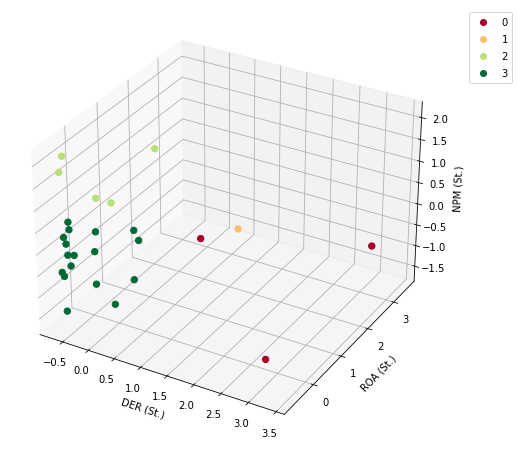

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_dataframe['DER (St.)']
y = new_dataframe['ROA (St.)']
z = new_dataframe['NPM (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("NPM (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_dataframe['category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

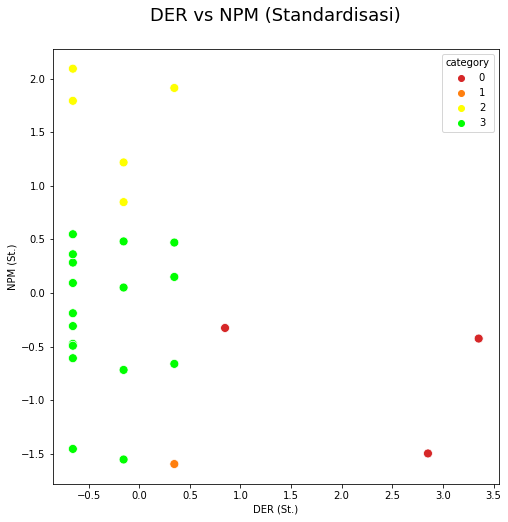

In [25]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen",
          5:"cyan",
          6:"blue",
          7:"brown"}

sns.scatterplot(x='DER (St.)', y='NPM (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs NPM (Standardisasi)", fontsize=18, y=1.05)
plt.show()

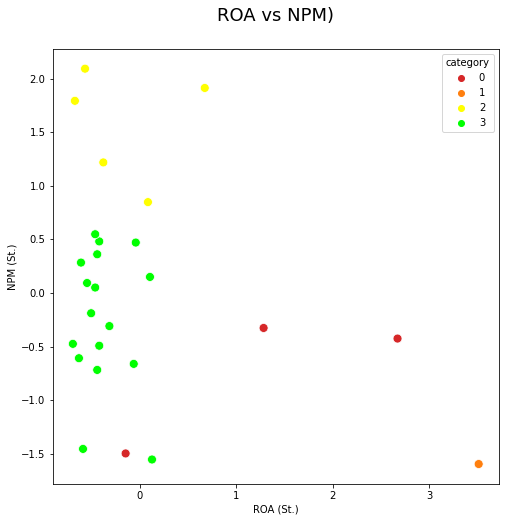

In [26]:
sns.scatterplot(x='ROA (St.)', y='NPM (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("ROA vs NPM)", fontsize=18, y=1.05)
plt.show()

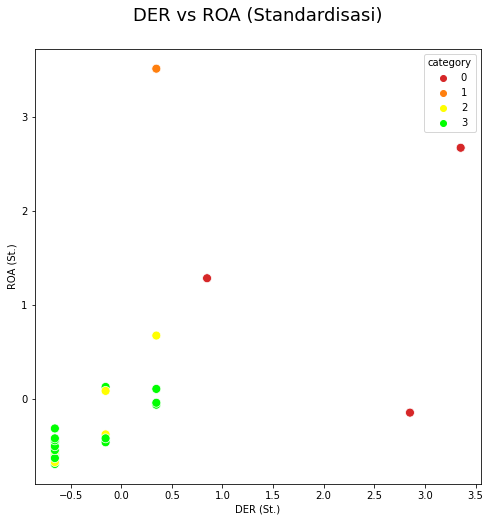

In [27]:
sns.scatterplot(x='DER (St.)', y='ROA (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs ROA (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [28]:
display(data)

,Emiten,DER,ROA,NPM,category
0,BANK,0.08,0.03,2.08,NaT
1,AGRS,5.41,0.01,0.12,NaT
2,ARTO,0.48,0.01,0.13,NaT
3,BBCA,5.03,0.03,0.46,NaT
4,BBHI,2.57,0.02,0.20,NaT
5,BBKP,10.03,0.03,0.73,NaT
6,BBMD,2.73,0.03,0.38,NaT
7,BBRI,4.75,0.02,0.19,NaT
8,BBSI,0.20,0.02,0.47,NaT
9,BCIC,7.01,0.02,0.45,NaT


In [29]:
# drop these row indexes
# from dataFrame
index_names = data[ data['Emiten'] == 'BANK' ].index
data.drop(index_names, inplace = True)
data.reset_index(drop=True, inplace=True)
data.drop(["category"], axis=1, inplace=True)

In [30]:
dftemp = pd.read_csv('../input/banksdata2021/BanksFinancialDataandRatio2021V5.csv')
df = pd.concat([dftemp, new_dataframe, data], axis=1)
df.head(26)

,Emiten,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),Emiten,DER,ROA,NPM
0,BANK,0.08,0.03,2.08,1,-1.596402,0.346925,3.512454,AGRS,5.41,0.01,0.12
1,AGRS,5.41,0.01,0.12,3,0.283841,-0.655302,-0.611847,ARTO,0.48,0.01,0.13
2,ARTO,0.48,0.01,0.13,3,-1.455296,-0.655302,-0.590804,BBCA,5.03,0.03,0.46
3,BBCA,5.03,0.03,0.46,3,0.149790,0.346925,0.103593,BBHI,2.57,0.02,0.20
4,BBHI,2.57,0.02,0.20,3,-0.718015,-0.154189,-0.443508,BBKP,10.03,0.03,0.73
5,BBKP,10.03,0.03,0.73,2,1.913620,0.346925,0.671737,BBMD,2.73,0.03,0.38
6,BBMD,2.73,0.03,0.38,3,-0.661572,0.346925,-0.064746,BBRI,4.75,0.02,0.19
7,BBRI,4.75,0.02,0.19,3,0.051015,-0.154189,-0.464550,BBSI,0.20,0.02,0.47
8,BBSI,0.20,0.02,0.47,3,-1.554070,-0.154189,0.124635,BCIC,7.01,0.02,0.45
9,BCIC,7.01,0.02,0.45,2,0.848267,-0.154189,0.082551,BDMN,3.26,0.01,0.08


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Emiten     26 non-null     object 
 1   DER        26 non-null     float64
 2   ROA        26 non-null     float64
 3   NPM        26 non-null     float64
 4   category   26 non-null     int64  
 5   NPM (St.)  26 non-null     float64
 6   DER (St.)  26 non-null     float64
 7   ROA (St.)  26 non-null     float64
 8   Emiten     25 non-null     object 
 9   DER        25 non-null     float64
 10  ROA        25 non-null     float64
 11  NPM        25 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 2.6+ KB


In [32]:
#df.to_csv('result.csv', index = False)
df.to_csv (r'D:\CQU MBA\MBA sessions\CQU\Sem 3\Financial Data Analytics\Assesment 2\export.csv', index = False, header=True)

In [33]:
kmeans.cluster_centers_

array([[ 1.57355391, -0.2544113 , -0.1741659 ],
       [-0.23659272, -0.36052939, -0.37914314],
       [-1.5964023 ,  0.34692451,  3.51245364],
       [-0.74976365,  2.3513772 ,  1.26793641]])

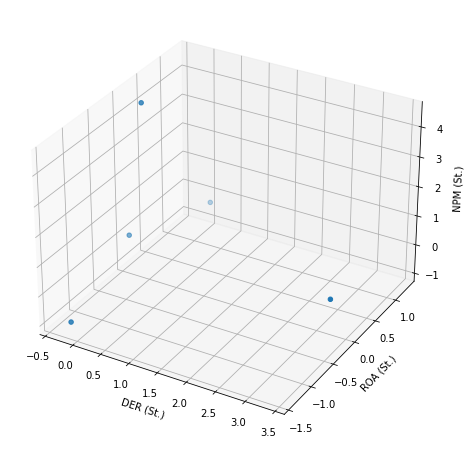

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("NPM (St.)")
ax.scatter(x, y, z)
plt.show()

In [35]:
#Negatively Impacted
df[df['category'] == 3].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,16.000000,16.000000,16.000000
mean,3.934706,0.015882,0.230588,3.0,-0.236593,-0.360529,-0.379143,4.041250,0.021250,0.330000
std,1.807191,0.007952,0.121010,0.0,0.637516,0.398488,0.254633,2.572679,0.018212,0.248435
min,0.200000,0.010000,0.080000,3.0,-1.554070,-0.655302,-0.696016,0.200000,0.010000,0.110000
25%,2.880000,0.010000,0.150000,3.0,-0.608657,-0.655302,-0.548720,2.802500,0.010000,0.185000
50%,4.070000,0.010000,0.200000,3.0,-0.188866,-0.655302,-0.443508,3.900000,0.015000,0.205000
75%,5.410000,0.020000,0.260000,3.0,0.283841,-0.154189,-0.317254,5.180000,0.022500,0.452500
max,6.160000,0.030000,0.470000,3.0,0.548416,0.346925,0.124635,10.030000,0.080000,1.020000


In [36]:
#Highly Negative Impacted
df[df['category'] == 2].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,9.066000,0.018000,0.328000,2.0,1.573554,-0.254411,-0.174166,4.684000,0.034000,0.516000
std,1.477373,0.008367,0.263666,0.0,0.521167,0.419261,0.554816,2.266369,0.032094,0.659341
min,7.010000,0.010000,0.090000,2.0,0.848267,-0.655302,-0.674974,2.730000,0.010000,0.080000
25%,8.060000,0.010000,0.140000,2.0,1.218671,-0.655302,-0.569762,3.260000,0.020000,0.210000
50%,9.690000,0.020000,0.230000,2.0,1.793680,-0.154189,-0.380381,3.400000,0.020000,0.230000
75%,10.030000,0.020000,0.450000,2.0,1.913620,-0.154189,0.082551,5.970000,0.030000,0.380000
max,10.540000,0.030000,0.730000,2.0,2.093531,0.346925,0.671737,8.060000,0.090000,1.680000


In [37]:
#Highly postively Impacted
df[df['category'] == 1].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,1.00,1.00,1.00,1.0,1.000000,1.000000,1.000000,1.00,1.00,1.00
mean,0.08,0.03,2.08,1.0,-1.596402,0.346925,3.512454,5.41,0.01,0.12
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.08,0.03,2.08,1.0,-1.596402,0.346925,3.512454,5.41,0.01,0.12
25%,0.08,0.03,2.08,1.0,-1.596402,0.346925,3.512454,5.41,0.01,0.12
50%,0.08,0.03,2.08,1.0,-1.596402,0.346925,3.512454,5.41,0.01,0.12
75%,0.08,0.03,2.08,1.0,-1.596402,0.346925,3.512454,5.41,0.01,0.12
max,0.08,0.03,2.08,1.0,-1.596402,0.346925,3.512454,5.41,0.01,0.12


In [38]:
#Positively Impacted
df[df['category'] == 0].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,2.480000,0.070000,1.013333,0.0,-0.749764,2.351377,1.267936,8.723333,0.016667,0.206667
std,1.841304,0.026458,0.670025,0.0,0.649550,1.325821,1.409890,2.447618,0.011547,0.160728
min,0.360000,0.040000,0.340000,0.0,-1.497628,0.848038,-0.148915,5.940000,0.010000,0.090000
25%,1.880000,0.060000,0.680000,0.0,-0.961423,1.850264,0.566525,7.815000,0.010000,0.115000
50%,3.400000,0.080000,1.020000,0.0,-0.425219,2.852490,1.281965,9.690000,0.010000,0.140000
75%,3.540000,0.085000,1.350000,0.0,-0.375832,3.103047,1.976362,10.115000,0.020000,0.265000
max,3.680000,0.090000,1.680000,0.0,-0.326444,3.353604,2.670760,10.540000,0.030000,0.390000
